In [ ]:
import os
import shutil
from tqdm import tqdm

# Input paths
iris_root = '/content/drive/MyDrive/Iris-eye preprocessed/CASIA-Iris-Thousand'
fv_root = '/content/drive/MyDrive/preprocessed 2nd session/1st session'

# Output root directory
output_root = '/content/drive/MyDrive/Multimodal Biometric Authentication'
os.makedirs(output_root, exist_ok=True)

# Helper: Find all subfolders under iris_root that contain image files
def get_leaf_folders_with_images(root_dir):
    leaf_folders = []
    for root, dirs, files in os.walk(root_dir):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if image_files:
            leaf_folders.append(root)
    return sorted(leaf_folders)

# Get iris and finger vein folders
iris_folders = get_leaf_folders_with_images(iris_root)
fv_folders = sorted([os.path.join(fv_root, f) for f in os.listdir(fv_root)
                     if os.path.isdir(os.path.join(fv_root, f))])

# Match to the number of finger vein folders
target_class_count = min(492, len(iris_folders), len(fv_folders))
iris_folders = iris_folders[:target_class_count]
fv_folders = fv_folders[:target_class_count]

print(f"✅ Creating {target_class_count} multimodal class folders...")

# Process and copy
for idx in tqdm(range(target_class_count)):
    class_folder = os.path.join(output_root, f"{idx+1:04d}")
    iris_target = os.path.join(class_folder, 'iris-eye')
    fv_target = os.path.join(class_folder, 'finger-vein')
    os.makedirs(iris_target, exist_ok=True)
    os.makedirs(fv_target, exist_ok=True)

    # Copy iris images
    iris_src = iris_folders[idx]
    iris_imgs = [f for f in os.listdir(iris_src)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    for img in iris_imgs:
        shutil.copy(os.path.join(iris_src, img), iris_target)

    # Copy finger vein images
    fv_src = fv_folders[idx]
    fv_imgs = [f for f in os.listdir(fv_src)
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    for img in fv_imgs:
        shutil.copy(os.path.join(fv_src, img), fv_target)

print(f"\n✅ Done. Multimodal dataset created at: {output_root}")

# Show confirmation
print("\n📁 Sample class folders created:")
for i in range(min(3, target_class_count)):
    print(" -", os.path.join(output_root, f"{i+1:04d}"))


✅ Creating 492 multimodal class folders...


100%|██████████| 492/492 [36:06<00:00,  4.40s/it]


✅ Done. Multimodal dataset created at: /content/drive/MyDrive/Multimodal Biometric Authentication

📁 Sample class folders created:
 - /content/drive/MyDrive/Multimodal Biometric Authentication/0001
 - /content/drive/MyDrive/Multimodal Biometric Authentication/0002
 - /content/drive/MyDrive/Multimodal Biometric Authentication/0003


In [ ]:
import os
import shutil
from tqdm import tqdm

# Input paths
iris_root = '/content/drive/MyDrive/Iris-eye preprocessed/CASIA-Iris-Thousand'
fv_root = '/content/drive/MyDrive/preprocessed 2nd session/1st session'

# Output root directory
output_root = '/content/drive/MyDrive/multimodal biometric 2'
os.makedirs(output_root, exist_ok=True)

# Helper: Find all subfolders under iris_root that contain image files
def get_leaf_folders_with_images(root_dir):
    leaf_folders = []
    for root, dirs, files in os.walk(root_dir):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if len(image_files) >= 6:
            leaf_folders.append(root)
    return sorted(leaf_folders)

# Get iris and finger vein folders
iris_folders = get_leaf_folders_with_images(iris_root)
fv_folders = sorted([os.path.join(fv_root, f) for f in os.listdir(fv_root)
                     if os.path.isdir(os.path.join(fv_root, f))])

# Match to the number of finger vein folders
target_class_count = min(492, len(iris_folders), len(fv_folders))
iris_folders = iris_folders[:target_class_count]
fv_folders = fv_folders[:target_class_count]

print(f"✅ Creating {target_class_count} multimodal class folders with 6 images per modality...")

# Process and copy
for idx in tqdm(range(target_class_count)):
    class_folder = os.path.join(output_root, f"{idx+1:04d}")
    iris_target = os.path.join(class_folder, 'iris-eye')
    fv_target = os.path.join(class_folder, 'finger-vein')
    os.makedirs(iris_target, exist_ok=True)
    os.makedirs(fv_target, exist_ok=True)

    # --- Copy iris images (first 6 only) ---
    iris_src = iris_folders[idx]
    iris_imgs = sorted([f for f in os.listdir(iris_src)
                        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])[:6]
    for img in iris_imgs:
        shutil.copy(os.path.join(iris_src, img), iris_target)

    # --- Copy finger vein images (first 6 only) ---
    fv_src = fv_folders[idx]
    fv_imgs = sorted([f for f in os.listdir(fv_src)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])[:6]
    for img in fv_imgs:
        shutil.copy(os.path.join(fv_src, img), fv_target)

print(f"\n✅ Done. Multimodal dataset with 6 images per modality created at: {output_root}")

# Show a few sample folders
print("\n📁 Sample class folders created:")
for i in range(min(3, target_class_count)):
    print(" -", os.path.join(output_root, f"{i+1:04d}"))


✅ Creating 492 multimodal class folders with 6 images per modality...


100%|██████████| 492/492 [1:05:14<00:00,  7.96s/it]


✅ Done. Multimodal dataset with 6 images per modality created at: /content/drive/MyDrive/multimodal biometric 2

📁 Sample class folders created:
 - /content/drive/MyDrive/multimodal biometric 2/0001
 - /content/drive/MyDrive/multimodal biometric 2/0002
 - /content/drive/MyDrive/multimodal biometric 2/0003


In [ ]:
!pip install timm einops


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
from PIL import Image
from tqdm import tqdm
import numpy as np

# Paths
input_root = '/content/drive/MyDrive/multimodal biometric 2'  # original dataset
output_root = '/content/drive/MyDrive/Multimodal Biometric 3'  # destination for preprocessed data
target_size = (224, 224)

def apply_clahe(image):
    # Convert RGB to LAB and apply CLAHE to L channel
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def preprocess_and_save_image(input_path, output_path):
    image = cv2.imread(input_path)
    if image is None:
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = apply_clahe(image)
    image = normalize_image(image)
    image = Image.fromarray(image)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    image.save(output_path)

# Main processing
for person_folder in tqdm(sorted(os.listdir(input_root))):
    person_path = os.path.join(input_root, person_folder)
    if not os.path.isdir(person_path):
        continue

    for modality in ['iris-eye', 'finger-vein']:
        modality_path = os.path.join(person_path, modality)
        if not os.path.isdir(modality_path):
            continue

        for img_file in sorted(os.listdir(modality_path)):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                input_img_path = os.path.join(modality_path, img_file)
                output_img_path = os.path.join(output_root, person_folder, modality, img_file)
                preprocess_and_save_image(input_img_path, output_img_path)

print("✅ All images preprocessed and saved to:", output_root)


100%|██████████| 492/492 [28:43<00:00,  3.50s/it]

✅ All images preprocessed and saved to: /content/drive/MyDrive/Multimodal Biometric 3


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from transformers import ViTModel, ViTImageProcessor
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from tqdm import tqdm
import random

# Configuration
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
SEED = 42
DATASET_PATH = '/content/drive/MyDrive/Multimodal Biometric 3'  # change as needed

torch.manual_seed(SEED)
random.seed(SEED)

# Transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform_common = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    normalize
])


# ViT image processor
image_processor = ViTImageProcessor.from_pretrained(
    "google/vit-base-patch16-224-in21k", use_fast=True
)

# Dataset loader
class BiometricDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}

        classes = sorted(os.listdir(root_dir))
        for idx, class_name in enumerate(classes):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            if not os.path.exists(iris_dir) or not os.path.exists(vein_dir):
                continue
            iris_imgs = os.listdir(iris_dir)
            vein_imgs = os.listdir(vein_dir)
            min_len = min(len(iris_imgs), len(vein_imgs))
            for i in range(min_len):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, sample['label']

# Load dataset
dataset = BiometricDataset(DATASET_PATH, transform=transform_common)
if len(dataset) == 0:
    raise ValueError("Dataset is empty! Check your DATASET_PATH and folder structure.")
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# Define multimodal model
class MultimodalFusionNet(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalFusionNet, self).__init__()

        self.iris_model = models.mobilenet_v2(pretrained=True)
        for param in self.iris_model.features.parameters():
            param.requires_grad = False
        self.iris_model.classifier = nn.Identity()

        self.vein_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
        for param in self.vein_model.parameters():
            param.requires_grad = False

        self.fusion = nn.Sequential(
            nn.Linear(1280 + 768, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, num_classes)
        )


    def forward(self, iris_img, vein_img):
        iris_feat = self.iris_model(iris_img)
        vein_feat = self.vein_model(pixel_values=vein_img).last_hidden_state[:, 0, :]
        fused = torch.cat((iris_feat, vein_feat), dim=1)
        return self.fusion(fused)

# Accuracy function
def accuracy(preds, labels):
    return (preds.argmax(dim=1) == labels).float().mean().item()

# Training function
def train_model(model, train_loader, val_loader, device, epochs):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(epochs):
        model.train()
        total_train_acc = 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_acc += accuracy(outputs, labels)

        avg_train_acc = total_train_acc / len(train_loader)

        model.eval()
        total_val_acc = 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                total_val_acc += accuracy(outputs, labels)

        avg_val_acc = total_val_acc / len(val_loader)
        print(f"Epoch {epoch+1} Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}")

# Run training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultimodalFusionNet(num_classes=len(dataset.class_to_idx))
train_model(model, train_loader, val_loader, device, epochs=EPOCHS)


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from transformers import ViTModel, ViTImageProcessor
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from tqdm import tqdm
import random

# Configuration
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
SEED = 42
PATIENCE = 5
DATASET_PATH = '/content/drive/MyDrive/Multimodal Biometric 3'

torch.manual_seed(SEED)
random.seed(SEED)

# Transforms with augmentation
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform_common = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    normalize
])

# ViT image processor
image_processor = ViTImageProcessor.from_pretrained(
    "google/vit-base-patch16-224-in21k", use_fast=True
)

# Dataset loader
class BiometricDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}

        classes = sorted(os.listdir(root_dir))
        for idx, class_name in enumerate(classes):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            if not os.path.exists(iris_dir) or not os.path.exists(vein_dir):
                continue
            iris_imgs = os.listdir(iris_dir)
            vein_imgs = os.listdir(vein_dir)
            min_len = min(len(iris_imgs), len(vein_imgs))
            for i in range(min_len):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, sample['label']

# Load dataset
dataset = BiometricDataset(DATASET_PATH, transform=transform_common)
if len(dataset) == 0:
    raise ValueError("Dataset is empty! Check your DATASET_PATH and folder structure.")

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# Define multimodal model
class MultimodalFusionNet(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalFusionNet, self).__init__()

        self.iris_model = models.mobilenet_v2(pretrained=True)
        for param in self.iris_model.features.parameters():
            param.requires_grad = False
        self.iris_model.classifier = nn.Identity()

        self.vein_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
        for param in self.vein_model.parameters():
            param.requires_grad = False

        self.fusion = nn.Sequential(
            nn.Linear(1280 + 768, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, num_classes)
        )

    def forward(self, iris_img, vein_img):
        iris_feat = self.iris_model(iris_img)
        vein_feat = self.vein_model(pixel_values=vein_img).last_hidden_state[:, 0, :]
        fused = torch.cat((iris_feat, vein_feat), dim=1)
        return self.fusion(fused)

# Accuracy function
def accuracy(preds, labels):
    return (preds.argmax(dim=1) == labels).float().mean().item()

# Training function with early stopping and scheduler
def train_model(model, train_loader, val_loader, device, epochs, patience):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_train_acc = 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_acc += accuracy(outputs, labels)

        avg_train_acc = total_train_acc / len(train_loader)

        model.eval()
        total_val_acc = 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                total_val_acc += accuracy(outputs, labels)

        avg_val_acc = total_val_acc / len(val_loader)
        scheduler.step(avg_val_acc)

        print(f"Epoch {epoch+1} - Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}")

        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
            print("✅ New best model saved.")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("🛑 Early stopping triggered.")
                break

# Run training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultimodalFusionNet(num_classes=len(dataset.class_to_idx))
train_model(model, train_loader, val_loader, device, epochs=EPOCHS, patience=PATIENCE)

# Load best model for final evaluation or inference
model.load_state_dict(torch.load('best_model.pt'))
model.eval()


In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models
from transformers import ViTModel, ViTImageProcessor
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from tqdm import tqdm
import random

# Configuration
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 50
SEED = 42
PATIENCE = 5
DATASET_PATH = '/content/drive/MyDrive/Multimodal Biometric 3'

torch.manual_seed(SEED)
random.seed(SEED)

def get_transforms():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    return transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        normalize
    ])

# Dataset loader
class BiometricDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {}

        classes = sorted(os.listdir(root_dir))
        for idx, class_name in enumerate(classes):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            if not os.path.exists(iris_dir) or not os.path.exists(vein_dir):
                continue
            iris_imgs = os.listdir(iris_dir)
            vein_imgs = os.listdir(vein_dir)
            min_len = min(len(iris_imgs), len(vein_imgs))
            for i in range(min_len):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, sample['label']

# Model
class MultimodalFusionNet(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalFusionNet, self).__init__()
        self.iris_model = models.mobilenet_v2(pretrained=True)
        self.iris_model.classifier = nn.Identity()

        self.vein_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

        self.fusion = nn.Sequential(
            nn.Linear(1280 + 768, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, num_classes)
        )

    def forward(self, iris_img, vein_img):
        iris_feat = F.normalize(self.iris_model(iris_img), dim=1)
        vein_feat = F.normalize(self.vein_model(pixel_values=vein_img).last_hidden_state[:, 0, :], dim=1)
        fused = torch.cat((iris_feat, vein_feat), dim=1)
        return self.fusion(fused)

# Accuracy
def accuracy(preds, labels):
    return (preds.argmax(dim=1) == labels).float().mean().item()

# Training
def train_model(model, train_loader, val_loader, device, epochs, patience):
    model.to(device)
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_train_acc = 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_acc += accuracy(outputs, labels)

        avg_train_acc = total_train_acc / len(train_loader)

        model.eval()
        total_val_acc = 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                total_val_acc += accuracy(outputs, labels)

        avg_val_acc = total_val_acc / len(val_loader)
        scheduler.step(avg_val_acc)

        print(f"Epoch {epoch+1} - Train Acc: {avg_train_acc:.4f}, Val Acc: {avg_val_acc:.4f}")

        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
            print("✅ New best model saved.")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("🛑 Early stopping triggered.")
                break

# Run
if __name__ == '__main__':
    transform = get_transforms()
    dataset = BiometricDataset(DATASET_PATH, transform=transform)
    if len(dataset) == 0:
        raise ValueError("Dataset is empty! Check your DATASET_PATH and folder structure.")

    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_set, val_set = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultimodalFusionNet(num_classes=len(dataset.class_to_idx))
    train_model(model, train_loader, val_loader, device, epochs=EPOCHS, patience=PATIENCE)

    model.load_state_dict(torch.load('best_model.pt'))
    model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/50: 100%|██████████| 148/148 [1:27:09<00:00, 35.33s/it]


Epoch 1 - Train Acc: 0.0059, Val Acc: 0.0017
✅ New best model saved.


Epoch 2/50:  31%|███       | 46/148 [27:05<59:50, 35.20s/it]  

In [ ]:
# Install necessary packages
!pip install transformers timm scikit-learn matplotlib seaborn

import os
import torch
import timm
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from glob import glob
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
BATCH_SIZE = 32
IMG_SIZE = 224
EPOCHS = 25
LR = 1e-4
NUM_CLASSES = 492  # Adjust to your dataset

# Transforms
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Custom multimodal dataset loader
class MultimodalDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_map = {}
        self.load_samples()

    def load_samples(self):
        class_dirs = sorted(os.listdir(self.root_dir))
        for idx, class_id in enumerate(class_dirs):
            class_path = os.path.join(self.root_dir, class_id)
            if os.path.isdir(class_path):
                finger_images = glob(os.path.join(class_path, "finger-vein", "*.jpg"))
                iris_images = glob(os.path.join(class_path, "iris-eye", "*.jpg"))
                min_len = min(len(finger_images), len(iris_images))
                self.samples += [(finger_images[i], iris_images[i], idx) for i in range(min_len)]
                self.class_map[idx] = class_id

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        finger_path, iris_path, label = self.samples[idx]
        finger = self.transform(Image.open(finger_path).convert("RGB"))
        iris = self.transform(Image.open(iris_path).convert("RGB"))
        return finger, iris, label

# Dataset and DataLoader
dataset = MultimodalDataset('/content/drive/MyDrive/Multimodal Biometric 3', transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# Feature extractor ViT
class FeatureExtractor(nn.Module):
    def __init__(self, model_name='vit_base_patch16_224', pretrained=True):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        self.model.head = nn.Identity()

    def forward(self, x):
        return self.model(x)

# Fusion model
class FusionClassifier(nn.Module):
    def __init__(self, input_dim=768*2, num_classes=NUM_CLASSES):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, feat1, feat2):
        fused = torch.cat([feat1, feat2], dim=1)  # Feature-level fusion
        return self.fc(fused)

# Score-level + attraction-level fusion wrapper
class MultimodalModel(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super().__init__()
        self.fv_extractor = FeatureExtractor()
        self.iris_extractor = FeatureExtractor()
        self.fusion_classifier = FusionClassifier(768*2, num_classes)

    def forward(self, fv_img, iris_img):
        fv_feat = self.fv_extractor(fv_img)
        iris_feat = self.iris_extractor(iris_img)

        logits = self.fusion_classifier(fv_feat, iris_feat)
        # Score-level fusion could also average the softmax scores:
        scores = F.softmax(logits, dim=1)
        return logits, scores

model = MultimodalModel().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# Training loop
def train_model():
    best_acc = 0.0
    for epoch in range(EPOCHS):
        model.train()
        total, correct = 0, 0
        for fv, iris, labels in train_loader:
            fv, iris, labels = fv.to(device), iris.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(fv, iris)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        acc = 100 * correct / total
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Accuracy: {acc:.2f}%")

        evaluate_model()

# Evaluation function
def evaluate_model():
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for fv, iris, labels in val_loader:
            fv, iris = fv.to(device), iris.to(device)
            outputs, _ = model(fv, iris)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

train_model()


In [ ]:
!pip install timm einops scikit-learn matplotlib optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [ ]:
!pip install opencv-python-headless scikit-image matplotlib


In [ ]:
import os
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import closing, opening, disk
import matplotlib.pyplot as plt

# Pupil detection
def detect_pupil(img):
    blurred = cv2.medianBlur(img, 5)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=40,
                                param1=70, param2=40, minRadius=50, maxRadius=80)
    if circles is not None:
        return np.uint16(np.around(circles))[0][0]  # (x, y, r)
    return None

# Normalize iris to rectangular format
def normalize_circle(img, center, radius, output_size=(64, 128)):
    theta = np.linspace(0, 2 * np.pi, output_size[1])
    r_vals = np.linspace(0, radius, output_size[0])
    r_grid, theta_grid = np.meshgrid(r_vals, theta)
    x_map = center[0] + r_grid * np.cos(theta_grid)
    y_map = center[1] + r_grid * np.sin(theta_grid)
    x_map = np.clip(x_map, 0, img.shape[1] - 1).astype(np.float32)
    y_map = np.clip(y_map, 0, img.shape[0] - 1).astype(np.float32)
    unwrapped = cv2.remap(img, x_map, y_map, interpolation=cv2.INTER_LINEAR)
    return unwrapped.T

# Set your base input and output directories
base_dir = "/content/drive/MyDrive/CASIA-Iris-Thousand"
output_dir = "/content/drive/MyDrive/preprocessed iris-eye"
os.makedirs(output_dir, exist_ok=True)

processed_images = []
skipped_images = 0

for root, dirs, files in os.walk(base_dir):
    for img_name in files:
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            continue

        img_path = os.path.join(root, img_name)
        try:
            image = cv2.imread(img_path)
            if image is None:
                print(f"⚠️ Unreadable image: {img_path}")
                skipped_images += 1
                continue

            # Step 1: CLAHE grayscale enhancement
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            enhanced = clahe.apply(gray)

            # Step 2: Detect Pupil
            pupil = detect_pupil(enhanced)
            if pupil is None:
                print(f"⛔ Skipped (pupil not found): {img_path}")
                skipped_images += 1
                continue
            x, y, r = pupil

            # Step 3: Morphological operations
            margin = 5
            roi = enhanced[y - r - margin:y + r + margin, x - r - margin:x + r + margin]
            otsu_thresh = threshold_otsu(roi)
            binary_roi = roi > otsu_thresh
            cleaned_roi = opening(closing(binary_roi, disk(3)), disk(2))

            # Step 4: Circular normalization
            normalized = normalize_circle(enhanced, (x, y), r)

            # Step 5: Resize and save
            final = cv2.resize(normalized, (224, 224), interpolation=cv2.INTER_AREA)

            person_id = os.path.basename(os.path.dirname(root))
            eye_label = os.path.basename(root)
            save_name = f"{person_id}_{eye_label}_{os.path.splitext(img_name)[0]}.png"
            save_path = os.path.join(output_dir, save_name)

            cv2.imwrite(save_path, final * 255 if final.max() <= 1.0 else final)
            processed_images.append(save_path)

        except Exception as e:
            print(f"❌ Error processing {img_path}: {e}")
            skipped_images += 1
            continue

print(f"\n✅ Total processed: {len(processed_images)}")
print(f"❌ Skipped: {skipped_images}")

for path in processed_images[:5]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(6,2))
    plt.imshow(img, cmap='gray')
    plt.title(f"Processed: {os.path.basename(path)}")
    plt.axis('off')
    plt.show()


In [ ]:
import os
import shutil
from tqdm import tqdm

# Input paths
iris_root = '/content/drive/MyDrive/iris-preprocessed'
fv_root = '/content/drive/MyDrive/Output drive session 1'

# Output root directory
output_root = '/content/drive/MyDrive/Multimodal Biometric 3'
os.makedirs(output_root, exist_ok=True)

# Helper: Find all subfolders under iris_root that contain image files
def get_leaf_folders_with_images(root_dir):
    leaf_folders = []
    for root, dirs, files in os.walk(root_dir):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if len(image_files) >= 6:
            leaf_folders.append(root)
    return sorted(leaf_folders)

# Get iris and finger vein folders
iris_folders = get_leaf_folders_with_images(iris_root)
fv_folders = sorted([os.path.join(fv_root, f) for f in os.listdir(fv_root)
                     if os.path.isdir(os.path.join(fv_root, f))])

# Match to the number of finger vein folders
target_class_count = min(492, len(iris_folders), len(fv_folders))
iris_folders = iris_folders[:target_class_count]
fv_folders = fv_folders[:target_class_count]

print(f"✅ Creating {target_class_count} multimodal class folders with 6 images per modality...")

# Process and copy
for idx in tqdm(range(target_class_count)):
    class_folder = os.path.join(output_root, f"{idx+1:04d}")
    iris_target = os.path.join(class_folder, 'iris-eye')
    fv_target = os.path.join(class_folder, 'finger-vein')
    os.makedirs(iris_target, exist_ok=True)
    os.makedirs(fv_target, exist_ok=True)

    # --- Copy iris images (first 6 only) ---
    iris_src = iris_folders[idx]
    iris_imgs = sorted([f for f in os.listdir(iris_src)
                        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])[:6]
    for img in iris_imgs:
        shutil.copy(os.path.join(iris_src, img), iris_target)

    # --- Copy finger vein images (first 6 only) ---
    fv_src = fv_folders[idx]
    fv_imgs = sorted([f for f in os.listdir(fv_src)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])[:6]
    for img in fv_imgs:
        shutil.copy(os.path.join(fv_src, img), fv_target)

print(f"\n✅ Done. Multimodal dataset with 6 images per modality created at: {output_root}")

# Show a few sample folders
print("\n📁 Sample class folders created:")
for i in range(min(3, target_class_count)):
    print(" -", os.path.join(output_root, f"{i+1:04d}"))


✅ Creating 492 multimodal class folders with 6 images per modality...


100%|██████████| 492/492 [1:14:10<00:00,  9.05s/it]


✅ Done. Multimodal dataset with 6 images per modality created at: /content/drive/MyDrive/Multimodal Biometric 3

📁 Sample class folders created:
 - /content/drive/MyDrive/Multimodal Biometric 3/0001
 - /content/drive/MyDrive/Multimodal Biometric 3/0002
 - /content/drive/MyDrive/Multimodal Biometric 3/0003


In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
from transformers import ViTFeatureExtractor, ViTModel
import timm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 25
PATIENCE = 5
SEED = 42
DATASET_PATH = "/content/drive/MyDrive/Multimodal Biometric 3"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- TRANSFORMS ---
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# --- DATASET ---
class MultiModalDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.class_to_idx = {}
        for idx, class_name in enumerate(sorted(os.listdir(root_dir))):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            iris_imgs = sorted(os.listdir(iris_dir))
            vein_imgs = sorted(os.listdir(vein_dir))
            for i in range(min(len(iris_imgs), len(vein_imgs))):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')
        label = sample['label']

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, label

# --- LIGHTWEIGHT ViT + SCORE & FEATURE FUSION ---
class MultiModalFusionModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.iris_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)
        self.vein_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)

        self.feature_fusion = nn.Sequential(
            nn.Linear(192 * 2, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, iris, vein):
        iris_feat = self.iris_model(iris)
        vein_feat = self.vein_model(vein)
        fusion_feat = torch.cat((iris_feat, vein_feat), dim=1)
        out = self.feature_fusion(fusion_feat)
        return out

# --- HELPER FUNCTIONS ---
def accuracy(outputs, labels):
    preds = outputs.argmax(dim=1)
    return (preds == labels).float().mean().item()

def train_model(model, train_loader, val_loader, device):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2)

    best_val_acc = 0
    patience_counter = 0
    model.to(device)

    for epoch in range(EPOCHS):
        model.train()
        train_acc, train_loss = 0, 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_acc += accuracy(outputs, labels)
            train_loss += loss.item()

        model.eval()
        val_acc, val_loss = 0, 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                val_acc += accuracy(outputs, labels)

        avg_val_acc = val_acc / len(val_loader)
        avg_train_acc = train_acc / len(train_loader)

        scheduler.step(avg_val_acc)

        print(f"Epoch {epoch+1} | Train Acc: {avg_train_acc:.4f} | Val Acc: {avg_val_acc:.4f}")

        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
            print("✅ Best model saved")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("🛑 Early stopping triggered")
                break

# --- LOAD DATASET ---
dataset = MultiModalDataset(DATASET_PATH, transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)

# --- TRAIN ---
model = MultiModalFusionModel(num_classes=len(dataset.class_to_idx))
train_model(model, train_loader, val_loader, DEVICE)

# --- EVALUATION ---
model.load_state_dict(torch.load('best_model.pt'))
model.eval()
preds, targets = [], []
with torch.no_grad():
    for iris, vein, labels in val_loader:
        iris, vein = iris.to(DEVICE), vein.to(DEVICE)
        outputs = model(iris, vein)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        targets.extend(labels.cpu().numpy())

print(f"Final Accuracy: {accuracy_score(targets, preds):.4f}")
print(f"F1 Score: {f1_score(targets, preds, average='macro'):.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Epoch 1: 100%|██████████| 74/74 [11:01<00:00,  8.94s/it]


Epoch 1 | Train Acc: 0.0051 | Val Acc: 0.0033
✅ Best model saved


Epoch 2: 100%|██████████| 74/74 [10:41<00:00,  8.68s/it]


Epoch 2 | Train Acc: 0.0534 | Val Acc: 0.0428
✅ Best model saved


Epoch 3: 100%|██████████| 74/74 [10:49<00:00,  8.78s/it]


Epoch 3 | Train Acc: 0.2742 | Val Acc: 0.1945
✅ Best model saved


Epoch 4: 100%|██████████| 74/74 [10:47<00:00,  8.74s/it]


Epoch 4 | Train Acc: 0.6537 | Val Acc: 0.1783


Epoch 5: 100%|██████████| 74/74 [10:42<00:00,  8.68s/it]


Epoch 5 | Train Acc: 0.8789 | Val Acc: 0.6825
✅ Best model saved


Epoch 6: 100%|██████████| 74/74 [10:31<00:00,  8.54s/it]


Epoch 6 | Train Acc: 0.9643 | Val Acc: 0.7764
✅ Best model saved


Epoch 7: 100%|██████████| 74/74 [10:32<00:00,  8.55s/it]


Epoch 7 | Train Acc: 0.9886 | Val Acc: 0.8610
✅ Best model saved


Epoch 8: 100%|██████████| 74/74 [10:38<00:00,  8.63s/it]


Epoch 8 | Train Acc: 0.9983 | Val Acc: 0.8774
✅ Best model saved


Epoch 9: 100%|██████████| 74/74 [10:35<00:00,  8.58s/it]


Epoch 9 | Train Acc: 1.0000 | Val Acc: 0.9138
✅ Best model saved


Epoch 10: 100%|██████████| 74/74 [10:38<00:00,  8.62s/it]


Epoch 10 | Train Acc: 1.0000 | Val Acc: 0.9368
✅ Best model saved


Epoch 11: 100%|██████████| 74/74 [10:31<00:00,  8.54s/it]


Epoch 11 | Train Acc: 1.0000 | Val Acc: 0.9584
✅ Best model saved


Epoch 12: 100%|██████████| 74/74 [10:31<00:00,  8.53s/it]


Epoch 12 | Train Acc: 1.0000 | Val Acc: 0.9718
✅ Best model saved


Epoch 13: 100%|██████████| 74/74 [10:29<00:00,  8.51s/it]


Epoch 13 | Train Acc: 1.0000 | Val Acc: 0.9683


Epoch 14: 100%|██████████| 74/74 [09:56<00:00,  8.06s/it]


Epoch 14 | Train Acc: 1.0000 | Val Acc: 0.9716


Epoch 15: 100%|██████████| 74/74 [09:40<00:00,  7.84s/it]


Epoch 15 | Train Acc: 1.0000 | Val Acc: 0.9732
✅ Best model saved


Epoch 16: 100%|██████████| 74/74 [09:35<00:00,  7.78s/it]


Epoch 16 | Train Acc: 1.0000 | Val Acc: 0.9749
✅ Best model saved


Epoch 17: 100%|██████████| 74/74 [09:21<00:00,  7.59s/it]


Epoch 17 | Train Acc: 1.0000 | Val Acc: 0.9800
✅ Best model saved


Epoch 18: 100%|██████████| 74/74 [09:21<00:00,  7.58s/it]


Epoch 18 | Train Acc: 1.0000 | Val Acc: 0.9868
✅ Best model saved


Epoch 19: 100%|██████████| 74/74 [09:19<00:00,  7.56s/it]


Epoch 19 | Train Acc: 1.0000 | Val Acc: 0.9784


Epoch 20: 100%|██████████| 74/74 [09:19<00:00,  7.56s/it]


Epoch 20 | Train Acc: 1.0000 | Val Acc: 0.9819


Epoch 21: 100%|██████████| 74/74 [09:18<00:00,  7.55s/it]


Epoch 21 | Train Acc: 1.0000 | Val Acc: 0.9800


Epoch 22: 100%|██████████| 74/74 [09:14<00:00,  7.49s/it]


Epoch 22 | Train Acc: 1.0000 | Val Acc: 0.9817


Epoch 23: 100%|██████████| 74/74 [09:15<00:00,  7.51s/it]


Epoch 23 | Train Acc: 1.0000 | Val Acc: 0.9817
🛑 Early stopping triggered


<ipython-input-3-a0bcb2e23ca8>:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


Final Accuracy: 0.9865
F1 Score: 0.9784


In [ ]:
import os
import torch
import torch.nn as nn
import timm
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import random

# --- HYPERPARAMETERS ---
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
PATIENCE = 5
SEED = 42
LR = 1e-4
DATASET_PATH = "/content/drive/MyDrive/Multimodal Biometric 3"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- SEEDING ---
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

# --- TRANSFORMS & AUGMENTATION ---
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

class MultiModalDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.class_to_idx = {}
        for idx, class_name in enumerate(sorted(os.listdir(root_dir))):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            iris_imgs = sorted(os.listdir(iris_dir))
            vein_imgs = sorted(os.listdir(vein_dir))
            for i in range(min(len(iris_imgs), len(vein_imgs))):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')
        label = sample['label']

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, label

# --- LIGHTWEIGHT ViT + SCORE & FEATURE FUSION ---
class MultiModalFusionModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.iris_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)
        self.vein_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)

        self.feature_fusion = nn.Sequential(
            nn.Linear(192 * 2, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, iris, vein):
        iris_feat = self.iris_model(iris)
        vein_feat = self.vein_model(vein)
        fusion_feat = torch.cat((iris_feat, vein_feat), dim=1)
        out = self.feature_fusion(fusion_feat)
        return out

# --- HELPER FUNCTIONS ---
def accuracy(outputs, labels):
    preds = outputs.argmax(dim=1)
    return (preds == labels).float().mean().item()

def train_model(model, train_loader, val_loader, device):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2)

    best_val_acc = 0
    patience_counter = 0
    model.to(device)

    for epoch in range(EPOCHS):
        model.train()
        train_acc, train_loss = 0, 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_acc += accuracy(outputs, labels)
            train_loss += loss.item()

        model.eval()
        val_acc, val_loss = 0, 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                val_acc += accuracy(outputs, labels)

        avg_val_acc = val_acc / len(val_loader)
        avg_train_acc = train_acc / len(train_loader)

        scheduler.step(avg_val_acc)

        print(f"Epoch {epoch+1} | Train Acc: {avg_train_acc:.4f} | Val Acc: {avg_val_acc:.4f}")

        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
            print("✅ Best model saved")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("🛑 Early stopping triggered")
                break

# --- LOAD DATASET ---
dataset = MultiModalDataset(DATASET_PATH, transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)

# --- TRAIN ---
model = MultiModalFusionModel(num_classes=len(dataset.class_to_idx))
train_model(model, train_loader, val_loader, DEVICE)

# --- EVALUATION ---
model.load_state_dict(torch.load('best_model.pt'))
model.eval()
preds, targets = [], []
with torch.no_grad():
    for iris, vein, labels in val_loader:
        iris, vein = iris.to(DEVICE), vein.to(DEVICE)
        outputs = model(iris, vein)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        targets.extend(labels.cpu().numpy())

print(f"Final Accuracy: {accuracy_score(targets, preds):.4f}")
print(f"F1 Score: {f1_score(targets, preds, average='macro'):.4f}")


Epoch 1: 100%|██████████| 74/74 [09:32<00:00,  7.74s/it]


Epoch 1 | Train Acc: 0.0008 | Val Acc: 0.0000


Epoch 2: 100%|██████████| 74/74 [09:23<00:00,  7.62s/it]


Epoch 2 | Train Acc: 0.0063 | Val Acc: 0.0033
✅ Best model saved


Epoch 3: 100%|██████████| 74/74 [09:25<00:00,  7.64s/it]


Epoch 3 | Train Acc: 0.0293 | Val Acc: 0.0298
✅ Best model saved


Epoch 4: 100%|██████████| 74/74 [09:24<00:00,  7.63s/it]


Epoch 4 | Train Acc: 0.0817 | Val Acc: 0.0596
✅ Best model saved


Epoch 5: 100%|██████████| 74/74 [09:23<00:00,  7.62s/it]


Epoch 5 | Train Acc: 0.1719 | Val Acc: 0.1026
✅ Best model saved


Epoch 6: 100%|██████████| 74/74 [09:23<00:00,  7.61s/it]


Epoch 6 | Train Acc: 0.3143 | Val Acc: 0.1902
✅ Best model saved


Epoch 7: 100%|██████████| 74/74 [09:23<00:00,  7.62s/it]


Epoch 7 | Train Acc: 0.4807 | Val Acc: 0.2852
✅ Best model saved


Epoch 8: 100%|██████████| 74/74 [09:22<00:00,  7.61s/it]


Epoch 8 | Train Acc: 0.5973 | Val Acc: 0.3728
✅ Best model saved


Epoch 9: 100%|██████████| 74/74 [09:22<00:00,  7.60s/it]


Epoch 9 | Train Acc: 0.7236 | Val Acc: 0.4111
✅ Best model saved


Epoch 10: 100%|██████████| 74/74 [09:22<00:00,  7.61s/it]


Epoch 10 | Train Acc: 0.8147 | Val Acc: 0.4576
✅ Best model saved


Epoch 11: 100%|██████████| 74/74 [09:27<00:00,  7.67s/it]


Epoch 11 | Train Acc: 0.8819 | Val Acc: 0.6009
✅ Best model saved


Epoch 12: 100%|██████████| 74/74 [09:25<00:00,  7.64s/it]


Epoch 12 | Train Acc: 0.9212 | Val Acc: 0.7148
✅ Best model saved


Epoch 13: 100%|██████████| 74/74 [09:24<00:00,  7.63s/it]


Epoch 13 | Train Acc: 0.9522 | Val Acc: 0.7458
✅ Best model saved


Epoch 14: 100%|██████████| 74/74 [09:24<00:00,  7.63s/it]


Epoch 14 | Train Acc: 0.9640 | Val Acc: 0.7893
✅ Best model saved


Epoch 15: 100%|██████████| 74/74 [09:25<00:00,  7.64s/it]


Epoch 15 | Train Acc: 0.9796 | Val Acc: 0.8565
✅ Best model saved


Epoch 16: 100%|██████████| 74/74 [09:28<00:00,  7.68s/it]


Epoch 16 | Train Acc: 0.9856 | Val Acc: 0.8682
✅ Best model saved


Epoch 17: 100%|██████████| 74/74 [09:26<00:00,  7.66s/it]


Epoch 17 | Train Acc: 0.9885 | Val Acc: 0.3315


Epoch 18: 100%|██████████| 74/74 [09:30<00:00,  7.71s/it]


Epoch 18 | Train Acc: 0.9932 | Val Acc: 0.9145
✅ Best model saved


Epoch 19:  15%|█▍        | 11/74 [01:36<09:13,  8.78s/it]


KeyboardInterrupt: 

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
from transformers import ViTFeatureExtractor, ViTModel
import timm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
PATIENCE = 5
SEED = 42
DATASET_PATH = "/content/drive/MyDrive/Multimodal Biometric 3"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- TRANSFORMS ---
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# --- DATASET ---
class MultiModalDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.transform = transform
        self.class_to_idx = {}
        for idx, class_name in enumerate(sorted(os.listdir(root_dir))):
            self.class_to_idx[class_name] = idx
            class_path = os.path.join(root_dir, class_name)
            iris_dir = os.path.join(class_path, 'iris-eye')
            vein_dir = os.path.join(class_path, 'finger-vein')
            iris_imgs = sorted(os.listdir(iris_dir))
            vein_imgs = sorted(os.listdir(vein_dir))
            for i in range(min(len(iris_imgs), len(vein_imgs))):
                self.samples.append({
                    'iris': os.path.join(iris_dir, iris_imgs[i]),
                    'vein': os.path.join(vein_dir, vein_imgs[i]),
                    'label': idx
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        iris = Image.open(sample['iris']).convert('RGB')
        vein = Image.open(sample['vein']).convert('RGB')
        label = sample['label']

        if self.transform:
            iris = self.transform(iris)
            vein = self.transform(vein)

        return iris, vein, label

# --- LIGHTWEIGHT ViT + SCORE & FEATURE FUSION ---
class MultiModalFusionModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.iris_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)
        self.vein_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0)

        self.feature_fusion = nn.Sequential(
            nn.Linear(192 * 2, 1024),  # Increase dimension
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),  # Intermediate layer
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
)

    def forward(self, iris, vein):
        iris_feat = self.iris_model(iris)
        vein_feat = self.vein_model(vein)
        fusion_feat = torch.cat((iris_feat, vein_feat), dim=1)
        out = self.feature_fusion(fusion_feat)
        return out

# --- HELPER FUNCTIONS ---
def accuracy(outputs, labels):
    preds = outputs.argmax(dim=1)
    return (preds == labels).float().mean().item()

def train_model(model, train_loader, val_loader, device):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2)

    best_val_acc = 0
    patience_counter = 0
    model.to(device)

    for epoch in range(EPOCHS):
        model.train()
        train_acc, train_loss = 0, 0
        for iris, vein, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(iris, vein)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_acc += accuracy(outputs, labels)
            train_loss += loss.item()

        model.eval()
        val_acc, val_loss = 0, 0
        with torch.no_grad():
            for iris, vein, labels in val_loader:
                iris, vein, labels = iris.to(device), vein.to(device), labels.to(device)
                outputs = model(iris, vein)
                val_acc += accuracy(outputs, labels)

        avg_val_acc = val_acc / len(val_loader)
        avg_train_acc = train_acc / len(train_loader)

        scheduler.step(avg_val_acc)

        print(f"Epoch {epoch+1} | Train Acc: {avg_train_acc:.4f} | Val Acc: {avg_val_acc:.4f}")

        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
            print("✅ Best model saved")
        else:
            patience_counter += 1
            if patience_counter >= PATIENCE:
                print("🛑 Early stopping triggered")
                break

# --- LOAD DATASET ---
dataset = MultiModalDataset(DATASET_PATH, transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)

# --- TRAIN ---
model = MultiModalFusionModel(num_classes=len(dataset.class_to_idx))
train_model(model, train_loader, val_loader, DEVICE)

# --- EVALUATION ---
model.load_state_dict(torch.load('best_model.pt'))
model.eval()
preds, targets = [], []
with torch.no_grad():
    for iris, vein, labels in val_loader:
        iris, vein = iris.to(DEVICE), vein.to(DEVICE)
        outputs = model(iris, vein)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        targets.extend(labels.cpu().numpy())

print(f"Final Accuracy: {accuracy_score(targets, preds):.4f}")
print(f"F1 Score: {f1_score(targets, preds, average='macro'):.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Epoch 1: 100%|██████████| 74/74 [41:25<00:00, 33.59s/it]


Epoch 1 | Train Acc: 0.0034 | Val Acc: 0.0033
✅ Best model saved


Epoch 2: 100%|██████████| 74/74 [08:58<00:00,  7.28s/it]


Epoch 2 | Train Acc: 0.0086 | Val Acc: 0.0049
✅ Best model saved


Epoch 3: 100%|██████████| 74/74 [08:56<00:00,  7.26s/it]


Epoch 3 | Train Acc: 0.0772 | Val Acc: 0.0132
✅ Best model saved


Epoch 4: 100%|██████████| 74/74 [08:59<00:00,  7.29s/it]


Epoch 4 | Train Acc: 0.2595 | Val Acc: 0.1522
✅ Best model saved


Epoch 5: 100%|██████████| 74/74 [09:00<00:00,  7.30s/it]


Epoch 5 | Train Acc: 0.4710 | Val Acc: 0.4339
✅ Best model saved


Epoch 6: 100%|██████████| 74/74 [08:58<00:00,  7.28s/it]


Epoch 6 | Train Acc: 0.6927 | Val Acc: 0.4982
✅ Best model saved


Epoch 7: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 7 | Train Acc: 0.8233 | Val Acc: 0.6765
✅ Best model saved


Epoch 8: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 8 | Train Acc: 0.9099 | Val Acc: 0.7496
✅ Best model saved


Epoch 9: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 9 | Train Acc: 0.9502 | Val Acc: 0.7940
✅ Best model saved


Epoch 10: 100%|██████████| 74/74 [08:57<00:00,  7.26s/it]


Epoch 10 | Train Acc: 0.9761 | Val Acc: 0.8649
✅ Best model saved


Epoch 11: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 11 | Train Acc: 0.9911 | Val Acc: 0.8830
✅ Best model saved


Epoch 12: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 12 | Train Acc: 0.9975 | Val Acc: 0.9375
✅ Best model saved


Epoch 13: 100%|██████████| 74/74 [08:57<00:00,  7.27s/it]


Epoch 13 | Train Acc: 0.9987 | Val Acc: 0.9572
✅ Best model saved


Epoch 14: 100%|██████████| 74/74 [08:59<00:00,  7.29s/it]


Epoch 14 | Train Acc: 0.9983 | Val Acc: 0.9589
✅ Best model saved


Epoch 15: 100%|██████████| 74/74 [08:58<00:00,  7.28s/it]


Epoch 15 | Train Acc: 1.0000 | Val Acc: 0.9688
✅ Best model saved


Epoch 16: 100%|██████████| 74/74 [09:01<00:00,  7.32s/it]


Epoch 16 | Train Acc: 1.0000 | Val Acc: 0.9836
✅ Best model saved


Epoch 17: 100%|██████████| 74/74 [09:01<00:00,  7.32s/it]


Epoch 17 | Train Acc: 1.0000 | Val Acc: 0.9868
✅ Best model saved


Epoch 18: 100%|██████████| 74/74 [09:03<00:00,  7.34s/it]


Epoch 18 | Train Acc: 1.0000 | Val Acc: 0.9901
✅ Best model saved


Epoch 19: 100%|██████████| 74/74 [08:58<00:00,  7.27s/it]


Epoch 19 | Train Acc: 1.0000 | Val Acc: 0.9934
✅ Best model saved


Epoch 20: 100%|██████████| 74/74 [08:56<00:00,  7.25s/it]


Epoch 20 | Train Acc: 1.0000 | Val Acc: 0.9852


Epoch 21: 100%|██████████| 74/74 [09:18<00:00,  7.55s/it]


Epoch 21 | Train Acc: 1.0000 | Val Acc: 0.9885


Epoch 22: 100%|██████████| 74/74 [08:54<00:00,  7.22s/it]


Epoch 22 | Train Acc: 1.0000 | Val Acc: 0.9885


Epoch 23: 100%|██████████| 74/74 [08:55<00:00,  7.24s/it]


Epoch 23 | Train Acc: 1.0000 | Val Acc: 0.9934


Epoch 24: 100%|██████████| 74/74 [08:56<00:00,  7.25s/it]


Epoch 24 | Train Acc: 1.0000 | Val Acc: 0.9934
🛑 Early stopping triggered
Final Accuracy: 0.9932
F1 Score: 0.9846


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



🔍 Evaluation Metrics
Accuracy  : 0.9932
Precision : 0.9864
Recall    : 0.9837
F1 Score  : 0.9846

📊 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    1.0000    1.0000         1
           2     1.0000    1.0000    1.0000         4
           4     1.0000    1.0000    1.0000         2
           6     1.0000    1.0000    1.0000         2
           7     1.0000    1.0000    1.0000         1
           8     1.0000    1.0000    1.0000         2
           9     1.0000    1.0000    1.0000         2
          10     1.0000    1.0000    1.0000         3
          11     1.0000    1.0000    1.0000         1
          12     1.0000    1.0000    1.0000         1
          13     1.0000    1.0000    1.0000         1
          14     1.0000    1.0000    1.0000         3
          15     1.0000    1.0000    1.0000         2
          16     1.0000    1.0000    1.0000         1
          1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

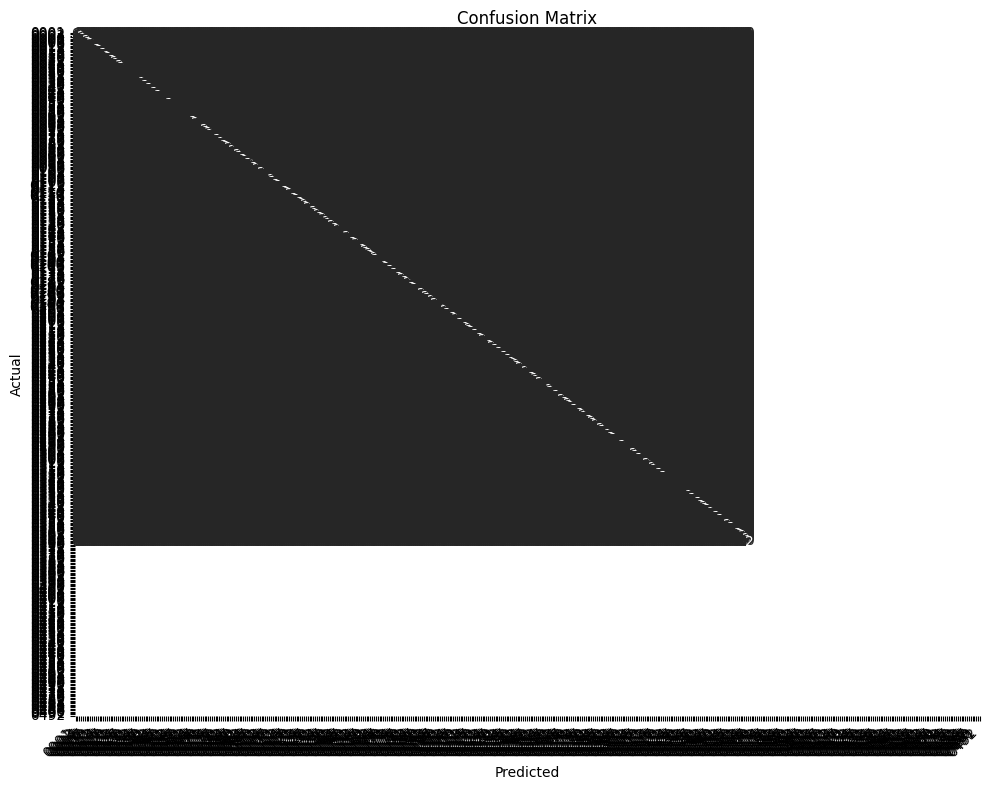

In [ ]:
# --- EVALUATION ---
model.load_state_dict(torch.load('best_model.pt'))
model.eval()
model.to(DEVICE)

preds, targets = [], []

with torch.no_grad():
    for iris, vein, labels in val_loader:
        iris, vein = iris.to(DEVICE), vein.to(DEVICE)
        outputs = model(iris, vein)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        targets.extend(labels.cpu().numpy())

# --- METRICS ---
acc = accuracy_score(targets, preds)
prec = precision_score(targets, preds, average='macro', zero_division=0)
rec = recall_score(targets, preds, average='macro', zero_division=0)
f1 = f1_score(targets, preds, average='macro', zero_division=0)

print("\n🔍 Evaluation Metrics")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

# --- CLASSIFICATION REPORT ---
print("\n📊 Classification Report:")
print(classification_report(targets, preds, digits=4))

# --- CONFUSION MATRIX PLOT ---
cm = confusion_matrix(targets, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(dataset.class_to_idx.keys()),
            yticklabels=list(dataset.class_to_idx.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-7-cb9363141772>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette="viridis")


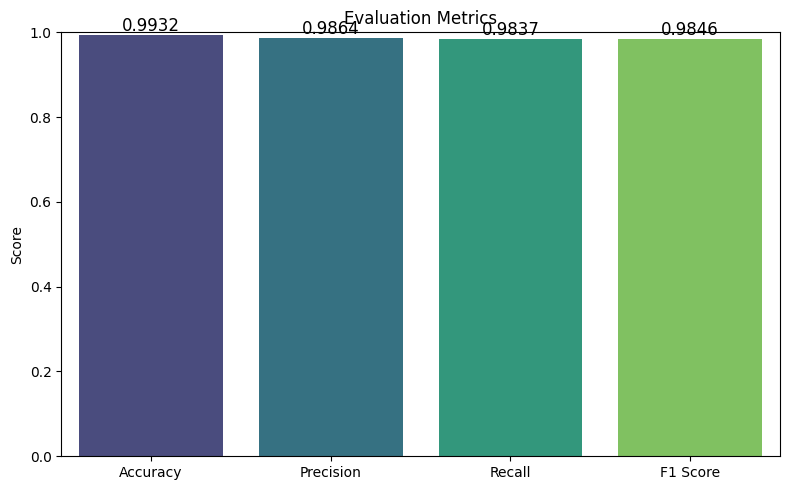

In [ ]:
# --- BAR CHART FOR EVALUATION METRICS ---
metrics = [acc, prec, rec, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metrics, palette="viridis")
plt.ylim(0, 1.0)
plt.title("Evaluation Metrics")
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


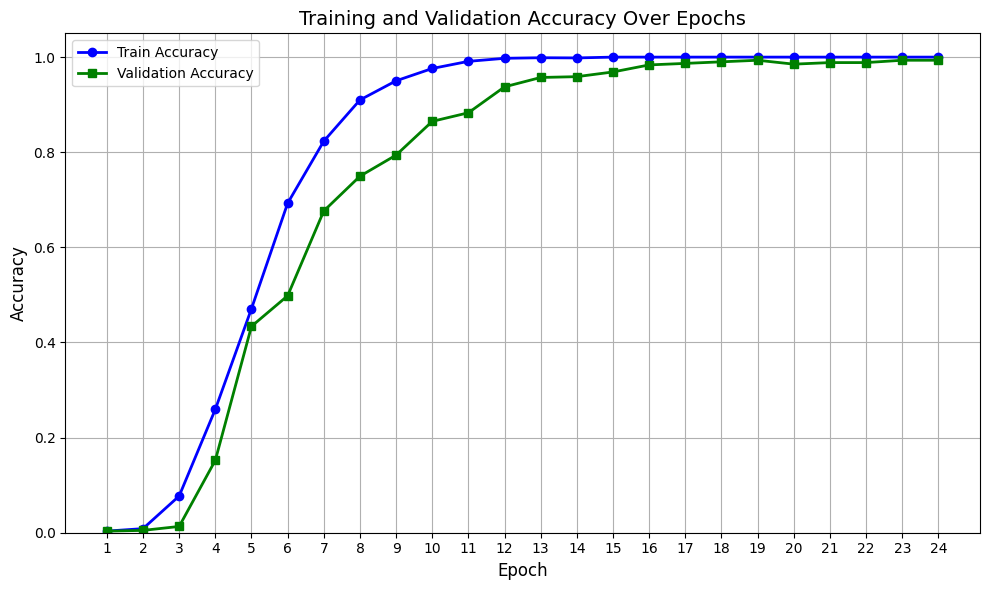

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define accuracy values
train_acc = [
    0.0034, 0.0086, 0.0772, 0.2595, 0.4710, 0.6927, 0.8233, 0.9099, 0.9502, 0.9761,
    0.9911, 0.9975, 0.9987, 0.9983, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
    1.0000, 1.0000, 1.0000, 1.0000
]

val_acc = [
    0.0033, 0.0049, 0.0132, 0.1522, 0.4339, 0.4982, 0.6765, 0.7496, 0.7940, 0.8649,
    0.8830, 0.9375, 0.9572, 0.9589, 0.9688, 0.9836, 0.9868, 0.9901, 0.9934, 0.9852,
    0.9885, 0.9885, 0.9934, 0.9934
]

# Step 2: Plotting
epochs = list(range(1, len(train_acc) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label="Train Accuracy", color="blue", linewidth=2, marker='o')  # Remove marker='o' for no dots
plt.plot(epochs, val_acc, label="Validation Accuracy", color="green", linewidth=2, marker='s')  # Remove marker='s' for no dots

plt.title("Training and Validation Accuracy Over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
